In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sympy import *
from scipy.integrate import quad
import TridiagonalMatrixHandler as tmh
from numba import njit
%matplotlib notebook

# $$\frac{\partial u}{\partial t}=D\frac{\partial^2 u}{\partial x^2} + au(1-\frac{I}{T(I)}) - σu;$$

$$F(u)=au^i_j\cdot(1- \frac{I}{T(I)})- \sigma u^{i+1}_j$$
$$где\qquad T(I)=T(I(u))=K + K_1I(u); \qquad I=I(u) = \int_0^1 u(x,t)dx.$$

In [3]:
tmh.showAllConstant()
K1 = 12


def allSourceFraction(numerator, i, u1):
    integrall_tmp = quad(lambda x: u1, 0, tmh.L)[0]
    F = K1 + tmh.sourceKoeff * integrall_tmp
    return integrall_tmp/F

u, x = tmh.createAndSolveMatrix(allSourceFraction)
print("\nФункция по которой считаем доступные ресурсы T(I)= " + str(tmh.sourceKoeff) + " + " + str(K1) +" * integral(u(x,t)*dx)")
#print(u.max())

Коэффициент миграции (D) = 0.5	Рождения новых людей (a) = 2.0
Смертность населения (σ) = 1.0	Ёмкость среды K = 2.0
Количество точек по ОХ (N) = 100	Количество точек по времени (KT) = 1000


TypingError: Failed at nopython (nopython frontend)
Internal error at <numba.typeinfer.ArgConstraint object at 0x151e886c18>:
--%<----------------------------------------------------------------------------
Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/numba/errors.py", line 577, in new_error_context
    yield
  File "/anaconda3/lib/python3.7/site-packages/numba/typeinfer.py", line 199, in __call__
    assert ty.is_precise()
AssertionError

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/anaconda3/lib/python3.7/site-packages/numba/typeinfer.py", line 142, in propagate
    constraint(typeinfer)
  File "/anaconda3/lib/python3.7/site-packages/numba/typeinfer.py", line 200, in __call__
    typeinfer.add_type(self.dst, ty, loc=self.loc)
  File "/anaconda3/lib/python3.7/contextlib.py", line 130, in __exit__
    self.gen.throw(type, value, traceback)
  File "/anaconda3/lib/python3.7/site-packages/numba/errors.py", line 585, in new_error_context
    six.reraise(type(newerr), newerr, tb)
  File "/anaconda3/lib/python3.7/site-packages/numba/six.py", line 659, in reraise
    raise value
numba.errors.InternalError: [1m[1m[0m
[0m[1m[1] During: typing of argument at /Users/o.peretyatko/Study/university/Diplom/TridiagonalMatrixHandler.py (63)[0m
--%<----------------------------------------------------------------------------

[1m
File "TridiagonalMatrixHandler.py", line 63:[0m
[1mdef createAndSolveMatrix(allSourceFraction):  # заполняем трехдиагональную матрицу Ax=d
[1m    A = np.zeros((N - 2, N - 2))
[0m    [1m^[0m[0m

This error may have been caused by the following argument(s):
- argument 0: [1mcannot determine Numba type of <class 'function'>[0m

This is not usually a problem with Numba itself but instead often caused by
the use of unsupported features or an issue in resolving types.

To see Python/NumPy features supported by the latest release of Numba visit:
http://numba.pydata.org/numba-doc/dev/reference/pysupported.html
and
http://numba.pydata.org/numba-doc/dev/reference/numpysupported.html

For more information about typing errors and how to debug them visit:
http://numba.pydata.org/numba-doc/latest/user/troubleshoot.html#my-code-doesn-t-compile

If you think your code should work with Numba, please report the error message
and traceback, along with a minimal reproducer at:
https://github.com/numba/numba/issues/new


<IPython.core.display.Javascript object>


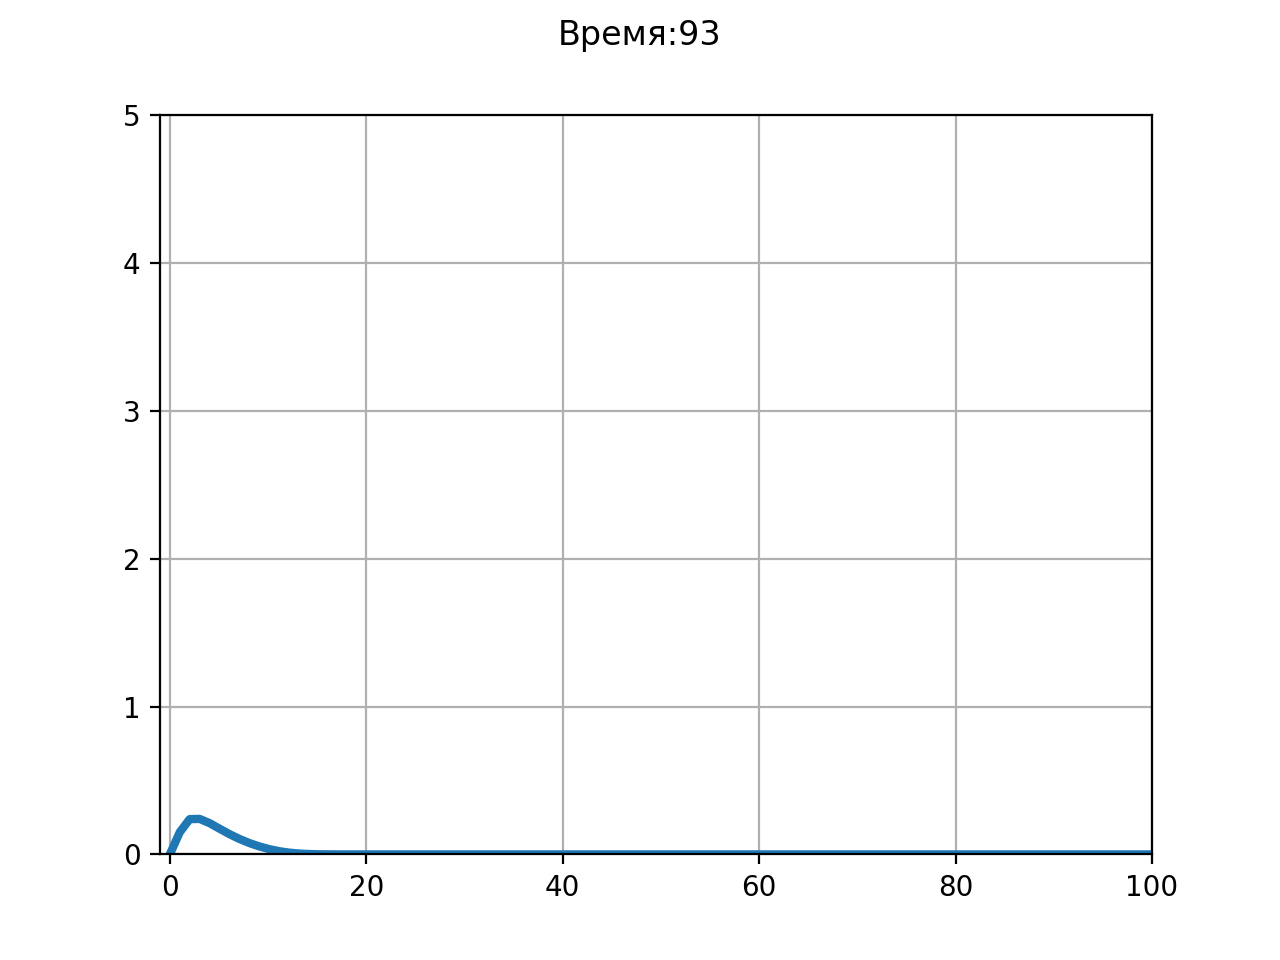

In [12]:
fig = plt.figure(facecolor='white')
ax = plt.axes(xlim=(-1, tmh.L), ylim=(0, 5) )
line, = ax.plot([ ], [ ], lw=3)
def redraw(i):
    line.set_data(x, u[:,i])
    string = 'Время:'+str(i)
    plt.suptitle(string)
anim = animation.FuncAnimation(fig,redraw,frames=tmh.KT,interval=10)
plt.grid(True)
plt.show()

In [12]:
diff = 0.5
value = 0
for i in range(1, tmh.N - 1):
    if abs(u[int(tmh.N/3), int(tmh.KT/3)] - u[i, int(tmh.KT/3) + 1]) < diff and x[int(tmh.N/3)] != x[i]:
        diff = abs(u[int(tmh.N/3), int(tmh.KT/3)] - u[i, int(tmh.KT/3) + 1])
        value = abs(x[int(tmh.N/3)] - x[i])
print('Speed:', value/tmh.tau)


Speed: 10.090909090909093
